## Complex Systrems in Bioinformatics Block 3 Assignment 1
#### Petko Antonov 
#### Hyunchang Oh 

## Ex. 1A 
Euclidean distance

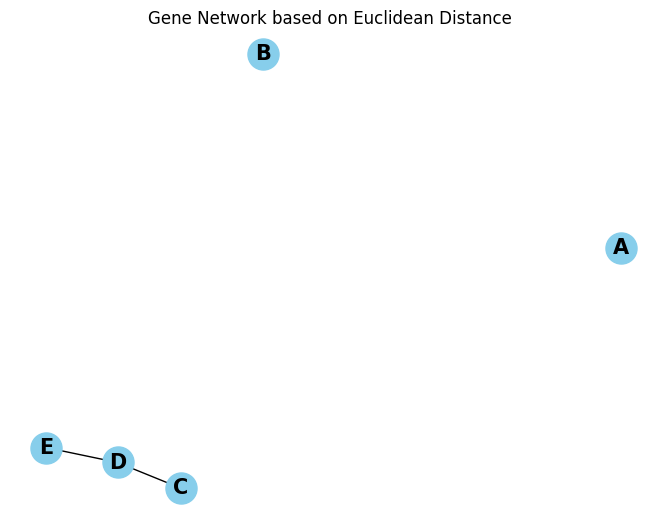

In [37]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('rpkm.csv', header=None)

# Extract gene names and expression values
expression_values = data.values
genes = ['A', 'B', 'C', 'D', 'E']

# Calculate Euclidean distance between each pair of genes
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Create a graph
G = nx.Graph()

# Add nodes
for gene in genes:
    G.add_node(gene)

genes = ['A', 'B', 'C', 'D', 'E']

# Add edges based on Euclidean distance
for i in range(len(genes)):
    for j in range(i+1, len(genes)):
        dist = euclidean_distance(expression_values[i], expression_values[j])
        if dist < 10:
            G.add_edge(genes[i], genes[j])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=15, font_weight="bold")
plt.title("Gene Network based on Euclidean Distance")
plt.show()

## 1B 
Correlation coefficient

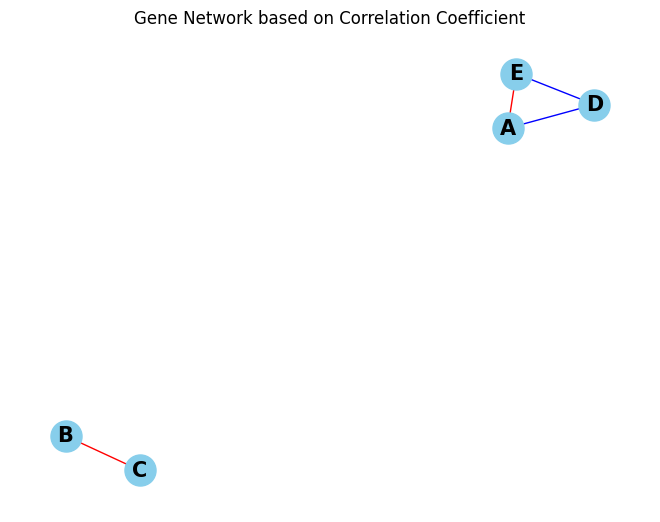

In [38]:
# Create a graph
G = nx.Graph()

# Add nodes
for gene in genes:
    G.add_node(gene)


# Add edges based on Pearson correlation coefficient
for i in range(len(genes)):
    for j in range(i+1, len(genes)):
        corr_coef = np.corrcoef(expression_values[i], expression_values[j])[0, 1]
        if abs(corr_coef) > 0.75:
            color = 'red' if corr_coef > 0 else 'blue'
            G.add_edge(genes[i], genes[j], color=color)

# Draw the graph
edges = G.edges(data=True)
colors = [edge[2]['color'] for edge in edges]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=15, font_weight="bold", edge_color=colors)
plt.title("Gene Network based on Correlation Coefficient")
plt.show()


## 1C 
L1 norn

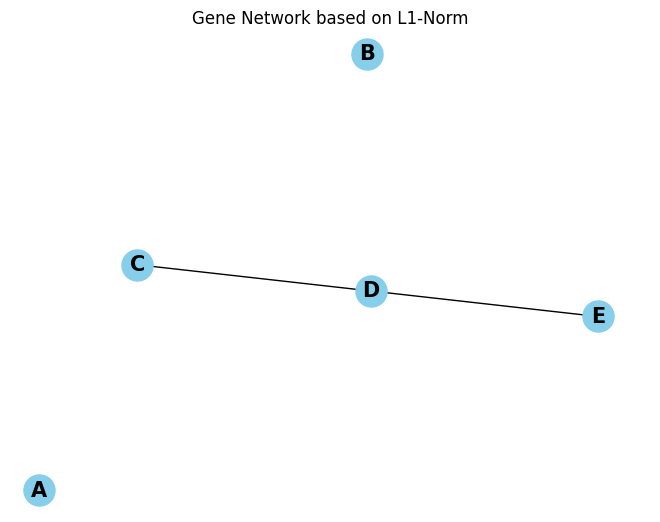

In [39]:
# Calculate L1-norm between each pair of genes
def l1_norm(x, y):
    return np.sum(np.abs(x - y))

# Create a graph
G = nx.Graph()

# Add nodes
for gene in genes:
    G.add_node(gene)

# Add edges based on L1-norm
for i in range(len(genes)):
    for j in range(i+1, len(genes)):
        dist = l1_norm(expression_values[i], expression_values[j])
        if dist < 20:
            G.add_edge(genes[i], genes[j])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=15, font_weight="bold")
plt.title("Gene Network based on L1-Norm")
plt.show()

## 1D 
Mutual information

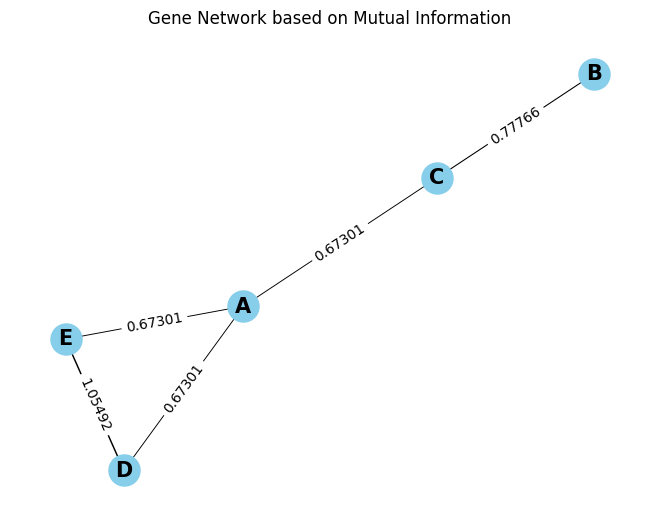

In [40]:
from sklearn.metrics import mutual_info_score

# Bin the RPKM values for each gene into 3 intervals
binned_data = data.apply(lambda x: pd.cut(x, bins=3, labels=False), axis=1)

# Calculate mutual information
def mutual_information(x, y):
    return mutual_info_score(x, y).round(5)

# Create a graph
G = nx.Graph()

# Add nodes
for gene in genes:
    G.add_node(gene)

# Add edges based on mutual information
for i in range(len(genes)):
    for j in range(i+1, len(genes)):
        mi = mutual_information(binned_data.iloc[i], binned_data.iloc[j])
        if mi > 0.65:
            G.add_edge(genes[i], genes[j], weight=mi)

# Draw the graph
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=15, font_weight="bold", edge_color="black", width=weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Gene Network based on Mutual Information")
plt.show()